In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
from matplotlib import pyplot as plt

from environments.gridworlds.gridworlds_classic import *
from environments.gridworlds.gridworlds_hexagonal import *
from environments.graphworlds.graphworlds import *

from agents.pgp.pgp_softmax import SoftMaxPGP
from utils.policy_functions import *
from utils.policy_tools import *

from plots.gridworlds.gridworld_visualizer import *
from plots.agent_plotter import *
from plots.mdp_visualizer import *

In [11]:
# Parameters
n_steps = 1000
alpha = 0.03

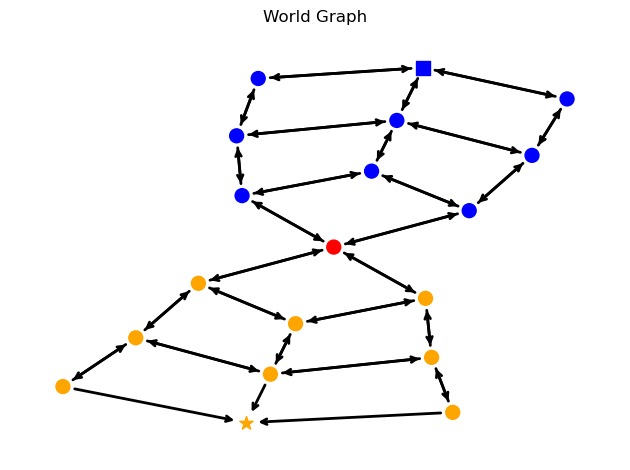

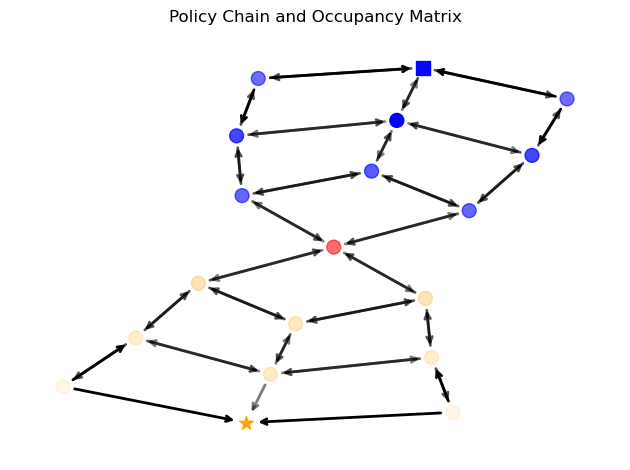

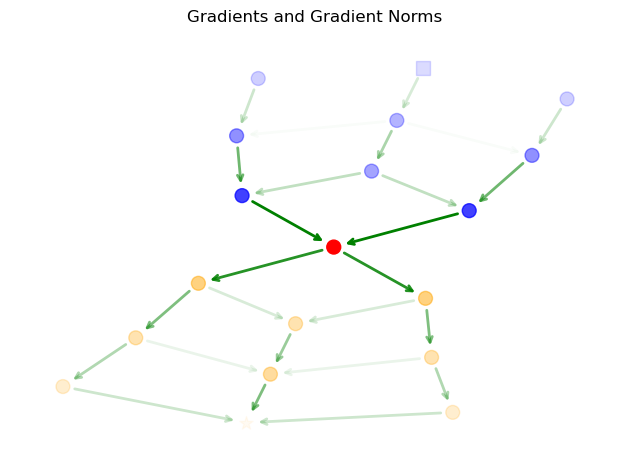

In [12]:
# world = TowerOfHanoi()
world = ButterflyWorld()
# world = ThreePentagonsWorld()
# world = FourRoom(7)

agent = SoftMaxPGP(world, p0_func=p0_onehot)

draw_world(agent)
plt.title("World Graph")
plt.tight_layout()
plt.show()

draw_policy(agent)
plt.title("Policy Chain and Occupancy Matrix")
plt.tight_layout()
plt.show()

draw_gradients(agent)
plt.title("Gradients and Gradient Norms")
plt.tight_layout()
plt.show()

training...


100%|██████████| 1000/1000 [00:01<00:00, 869.69it/s]


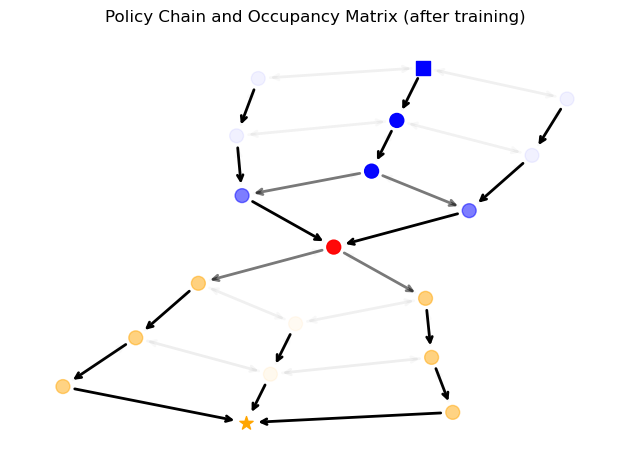

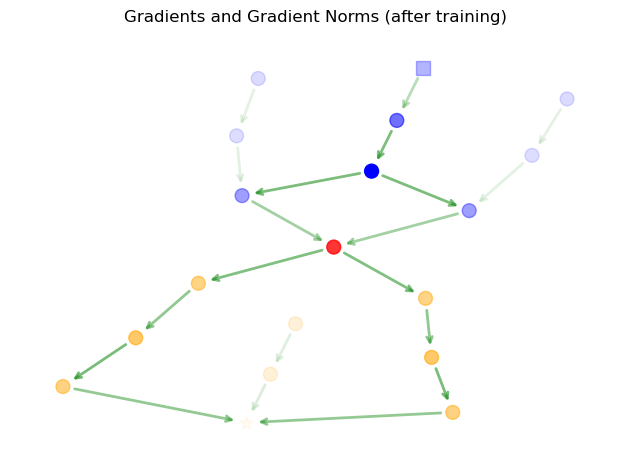

In [13]:
print("training...")
agent.learn( n_steps=n_steps, alpha=alpha)

draw_policy(agent)
plt.title("Policy Chain and Occupancy Matrix (after training)")
plt.tight_layout()
plt.show()

draw_gradients(agent)
plt.title("Gradients and Gradient Norms (after training)")
plt.tight_layout()
plt.show()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


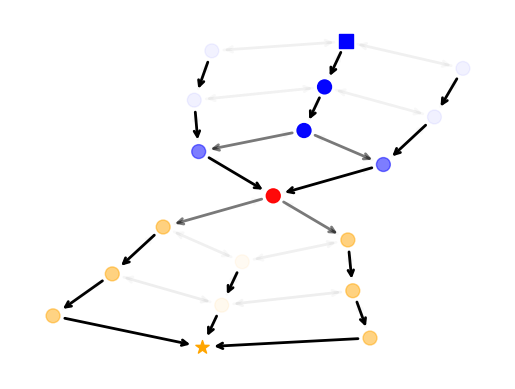

In [14]:
a = mdp_animation(agent, draw_policy, {}, ts_interval=10, fps=10)
a.ipython_display(fps=10, loop=False, autoplay=True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


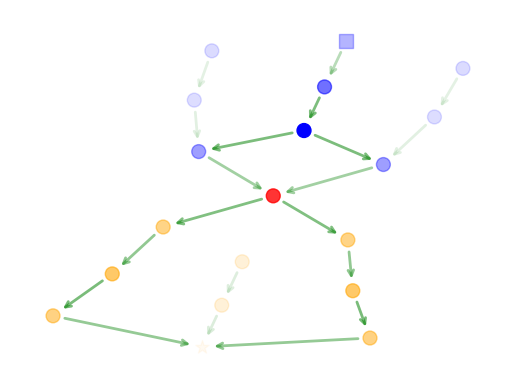

In [15]:
a = mdp_animation(agent, draw_gradients, {}, ts_interval=10, fps=10)
a.ipython_display(fps=10, loop=False, autoplay=True)

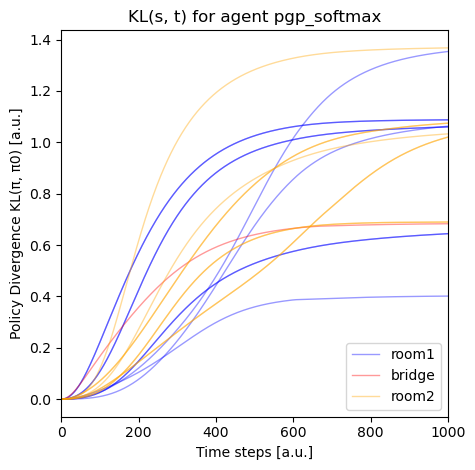

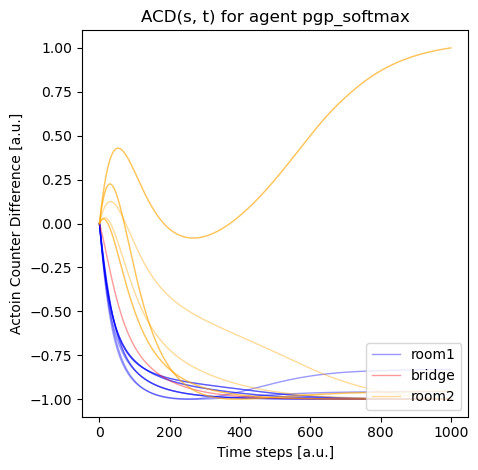

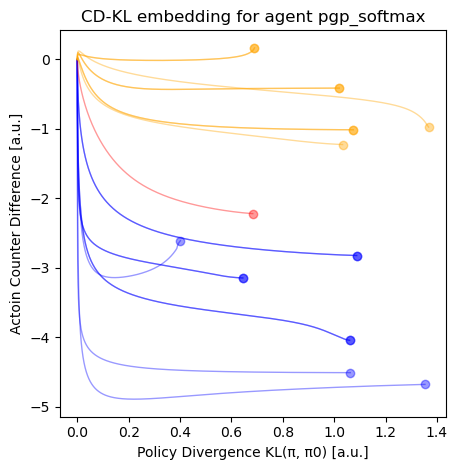

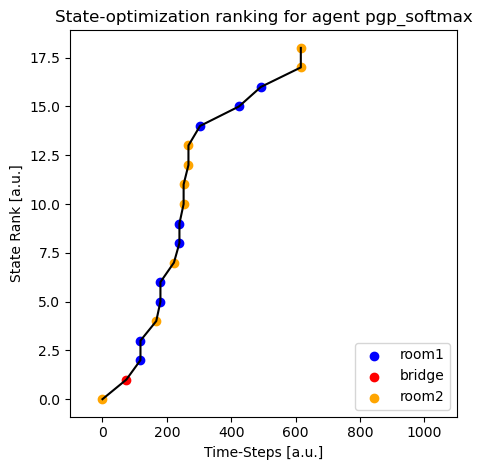

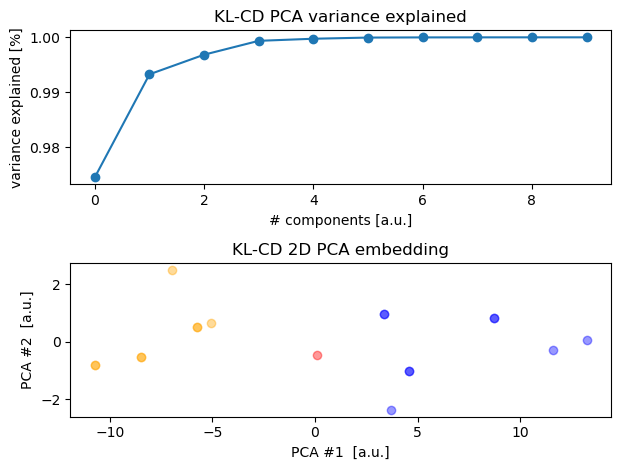

In [19]:
plotter = AgentPlotter([agent])
plotter.set_world(world)

plotter.plotKLDivergence(plot_legend=True, derivative=False, state_idxs=world.states_transient)
plt.tight_layout()
plt.show()

plotter.plotCounterDifference(plot_legend=True, normalize=True, state_idxs=world.states_transient)
plt.tight_layout()
plt.show()

plotter.plotKLCDEmbedding(plot_legend=False, kl_args={"derivative":False, "normalize":False}, cd_args={"derivative":False, "normalize":False}, state_idxs=world.states_transient)
plt.tight_layout()
plt.show()

plotter.plotStateRanks()
plt.tight_layout()
plt.show()

plotter.plotPCAEmbedding(state_idxs=world.states_transient)
plt.tight_layout()
plt.show()